# Data Cleaning

In [1]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns

In [2]:
# Import dataset and first 5 rows of the dataframe
imdb = pd.read_csv("IMDbMovies.csv")
imdb.head()

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime,Release Year,Rating,Number of Ratings,Budget,Gross in US & Canada,Gross worldwide,Opening Weekend Gross in US & Canada
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023"
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023"
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023"


## Understanding the data

### About Features:
#### Title: The name of the movie.
#### Summary: A brief overview of the movie's plot.
#### Director: The person responsible for overseeing the creative aspects of the film.
#### Writer: The individual who crafted the screenplay and story for the movie.
#### Main Genres: The primary categories or styles that the movie falls under.
#### Motion Picture Rating: The age-appropriate classification for viewers.
#### Motion Picture Rating Categories: i.e (G (General Audience): Suitable for all ages; no offensive content.)
#### Runtime: The total duration of the movie.
#### Release Year: The year in which the movie was officially released.
#### Rating: The average score given to the movie by viewers.
#### Number of Ratings: The total count of ratings submitted by viewers.
#### Budget: The estimated cost of producing the movie.
#### Gross in US & Canada: The total earnings from the movie's screening in the United States and Canada.
#### Gross worldwide: The overall worldwide earnings of the movie.
#### Opening Weekend Gross in US & Canada: The amount generated during the initial weekend of the movie's release in the United States and Canada.



In [53]:
#Inspect the data types
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title                                 9083 non-null   object 
 1   Summary                               9083 non-null   object 
 2   Director                              9052 non-null   object 
 3   Writer                                8759 non-null   object 
 4   Main Genres                           9076 non-null   object 
 5   Motion Picture Rating                 8285 non-null   object 
 6   Runtime                               8918 non-null   object 
 7   Release Year                          9076 non-null   float64
 8   Rating                                8813 non-null   object 
 9   Number of Ratings                     8813 non-null   object 
 10  Budget                                5879 non-null   object 
 11  Gross in US & Can

In [11]:
# Missing values.
imdb.isna().sum()

Title                                      0
Summary                                    0
Director                                  31
Writer                                   324
Main Genres                                7
Motion Picture Rating                    798
Runtime                                  165
Release Year                               7
Rating                                   270
Number of Ratings                        270
Budget                                  3204
Gross in US & Canada                    3019
Gross worldwide                         1955
Opening Weekend Gross in US & Canada    3388
rating_stars                            9083
n_ratings                               9083
dtype: int64

In [3]:
#The Opening Weekend Gross in US & Canada column combines the opeming date and the gross opening $. 
#Split it into two columns: opening_weekend_date and n_ratings .

# Initialize lists to store the extracted and formatted data
opening_weekend_date = []
gross_opening_weekend = []

# Loop through each value in the 'Opening Weekend Gross in US & Canada' column
for i in imdb['Opening Weekend Gross in US & Canada']:
    # Use regular expression to find the first occurrence of a capital letter (indicating the month)
    t = re.search('[A-Z]', str(i))
    
    # Check if a capital letter is found
    if t != None:
        # Extract the substring from the found capital letter to the end of the string,
        # and format it as a datetime object with the format '%b %d, %Y'
        opening_weekend_date.append(datetime.strptime(str(i)[t.start():], '%b %d, %Y').strftime('%m.%d.%Y'))
        
        # Extract the numeric digits before the capital letter, convert to float,
        # and divide by 10^6 to represent millions. Round to three decimal places.
        gross_opening_weekend.append(round(float(''.join(re.findall('[0-9]', str(i)[:t.start()]))) / 10**6, 3))
    else:
        # If no capital letter is found, append numpy NaN to both lists
        opening_weekend_date.append(np.nan)
        gross_opening_weekend.append(np.nan)

# Create new columns in the DataFrame with the extracted and formatted data
imdb['Opening Weekend in US & Canada'] = opening_weekend_date
imdb['Gross Opening Weekend (in millions)'] = gross_opening_weekend

# Drop the original 'Opening Weekend Gross in US & Canada' column
imdb.drop(['Opening Weekend Gross in US & Canada'], axis=1, inplace=True)

In [89]:
imdb

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime,Release Year,Rating,Number of Ratings,Budget,Gross in US & Canada,Gross worldwide,Opening Weekend in US & Canada,Gross Opening Weekend (in millions)
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381",11.26.2023,20.639
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235",11.19.2023,44.607
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN,NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585",11.19.2023,10.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,1h 35m,2020.0,6.3/10,24K,NaN,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,1h 38m,2003.0,6.4/10,15K,"$6,400,000 (estimated)","$767,373","$2,561,820",04.18.2004,0.050
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,2h 32m,1952.0,6.5/10,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN,NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,2h 32m,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#runtime - from hours to minutes

def runtime_to_minutes(time_str):
    if pd.isna(time_str):  # Check if the value is NaN
        return np.nan
    try:
        hours, minutes = time_str.split('h')
        hours = int(hours.strip())
        minutes = int(minutes.strip().replace('m', ''))
        total_minutes = hours * 60 + minutes
        return total_minutes
    except ValueError:
        return np.nan

# Apply the function to the 'Runtime' column
imdb['Runtime'] = imdb['Runtime'].apply(runtime_to_minutes)

imdb

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime,Release Year,Rating,Number of Ratings,Budget,Gross in US & Canada,Gross worldwide,Opening Weekend in US & Canada,Gross Opening Weekend (in millions)
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,158.0,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381",11.26.2023,20.639
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,157.0,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235",11.19.2023,44.607
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,118.0,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN,NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,102.0,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,106.0,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585",11.19.2023,10.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,95.0,2020.0,6.3/10,24K,NaN,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,98.0,2003.0,6.4/10,15K,"$6,400,000 (estimated)","$767,373","$2,561,820",04.18.2004,0.050
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,152.0,1952.0,6.5/10,16K,"$4,000,000 (estimated)","$36,000,000","$36,000,000",NaN,NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,152.0,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#release year
imdb['Release Year'] = pd.to_numeric(imdb['Release Year'], errors='coerce') # Convert non-numeric values to NaN
imdb['Release Year'] = imdb['Release Year'].astype(pd.Int32Dtype()) # Convert float years to integers
# rating 
imdb['Rating'] = imdb['Rating'].str.split('/').str[0] # Extract only the numerical rating

In [6]:
# number of ratings
def convert_ratings(rating_str): #replace strings (38K) with floats
    if isinstance(rating_str, str):
        if 'K' in rating_str:
            return float(rating_str.replace('K', '')) * 1000
        elif 'M' in rating_str:
            return float(rating_str.replace('M', '')) * 1000000
        else:
            return float(rating_str)
    else:
        return float(rating_str)
    
# Apply the function to the 'Number of Ratings' column
imdb['Number of Ratings'] = imdb['Number of Ratings'].apply(convert_ratings)


In [7]:
def convert_budget(budget_str):
    if isinstance(budget_str, float):
        return budget_str
    else:
        # Extract numeric value from budget string
        numeric_value = float(''.join(filter(str.isdigit, budget_str)))
        return numeric_value

# Apply the function to the 'Budget' column
imdb['Budget'] = imdb['Budget'].apply(convert_budget)


In [8]:
# Define a function to correct columns with monetary values in millions
def corrected_columns(dataframe, c):
    # Create a new list to store the corrected values
    new_list = [
        # If the element is a string representation of 'nan', set the value to numpy NaN.
        np.nan if str(b).lower() == 'nan' 
        # If the element is not 'nan', extract numeric digits and convert to float,
        # then divide by 10^6 to represent millions.
        else round(float(''.join(re.findall('[0-9]', str(b)))) / 10**6, 3) 
        # Iterate through each element in the column of the DataFrame.
        for b in dataframe[c]
    ]
    return new_list

# Apply the corrected_columns function to the 'Budget' column
imdb['Budget (in millions)'] = corrected_columns(imdb, 'Budget')

# Apply the corrected_columns function to the 'Gross in US & Canada' column
imdb['Gross in US & Canada (in millions)'] = corrected_columns(imdb, 'Gross in US & Canada')

# Apply the corrected_columns function to the 'Gross worldwide' column
imdb['Gross worldwide (in millions)'] = corrected_columns(imdb, 'Gross worldwide')

# Drop the original 'Gross in Us & Canada' and 'Gross worldwide' columns
imdb.drop(['Gross in US & Canada', 'Gross worldwide', 'Budget'], axis=1, inplace=True)

In [96]:
imdb

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime,Release Year,Rating,Number of Ratings,Opening Weekend in US & Canada,Gross Opening Weekend (in millions),Budget (in millions),Gross in US & Canada (in millions),Gross worldwide (in millions)
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,158.0,2023,6.7,38000.0,11.26.2023,20.639,NaN,37.514,84.968
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,157.0,2023,7.2,37000.0,11.19.2023,44.607,1000.0,105.043,191.729
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,118.0,2023,6.8,117000.0,NaN,NaN,NaN,NaN,0.421
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,102.0,2023,7.0,10000.0,NaN,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,106.0,2023,7.0,9100.0,11.19.2023,10.306,NaN,25.409,29.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,95.0,2020,6.3,24000.0,NaN,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,98.0,2003,6.4,15000.0,04.18.2004,0.050,64.0,0.767,2.562
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,152.0,1952,6.5,16000.0,NaN,NaN,40.0,36.000,36.000
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,152.0,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Analysis
###    1) Univariate Data Analysis
###    2) Bivariate/Multivariate Analysis

In [9]:
# Descriptive statistics
descriptive_stats = imdb.describe()
descriptive_stats

,Runtime,Release Year,Number of Ratings,Gross Opening Weekend (in millions),Budget (in millions),Gross in US & Canada (in millions),Gross worldwide (in millions)
count,8773.000000,9076.0,8.813000e+03,5695.000000,5879.000000,6064.000000,7128.000000
mean,108.664881,2004.142133,9.985751e+04,12.449987,678.431166,46.809895,87.122463
std,22.002556,18.849816,1.834821e+05,22.363104,7102.783833,72.906104,179.378745
min,61.000000,1915.0,6.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,95.000000,1994.0,1.200000e+04,0.204500,60.000000,4.105000,2.923000
50%,105.000000,2010.0,4.000000e+04,5.304000,200.000000,22.978500,23.838000
75%,118.000000,2019.0,1.060000e+05,14.694000,461.500000,57.474500,88.971250
max,607.000000,2027.0,2.800000e+06,357.115000,300000.000000,936.662000,2923.706000


/Users/riemeanetor/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


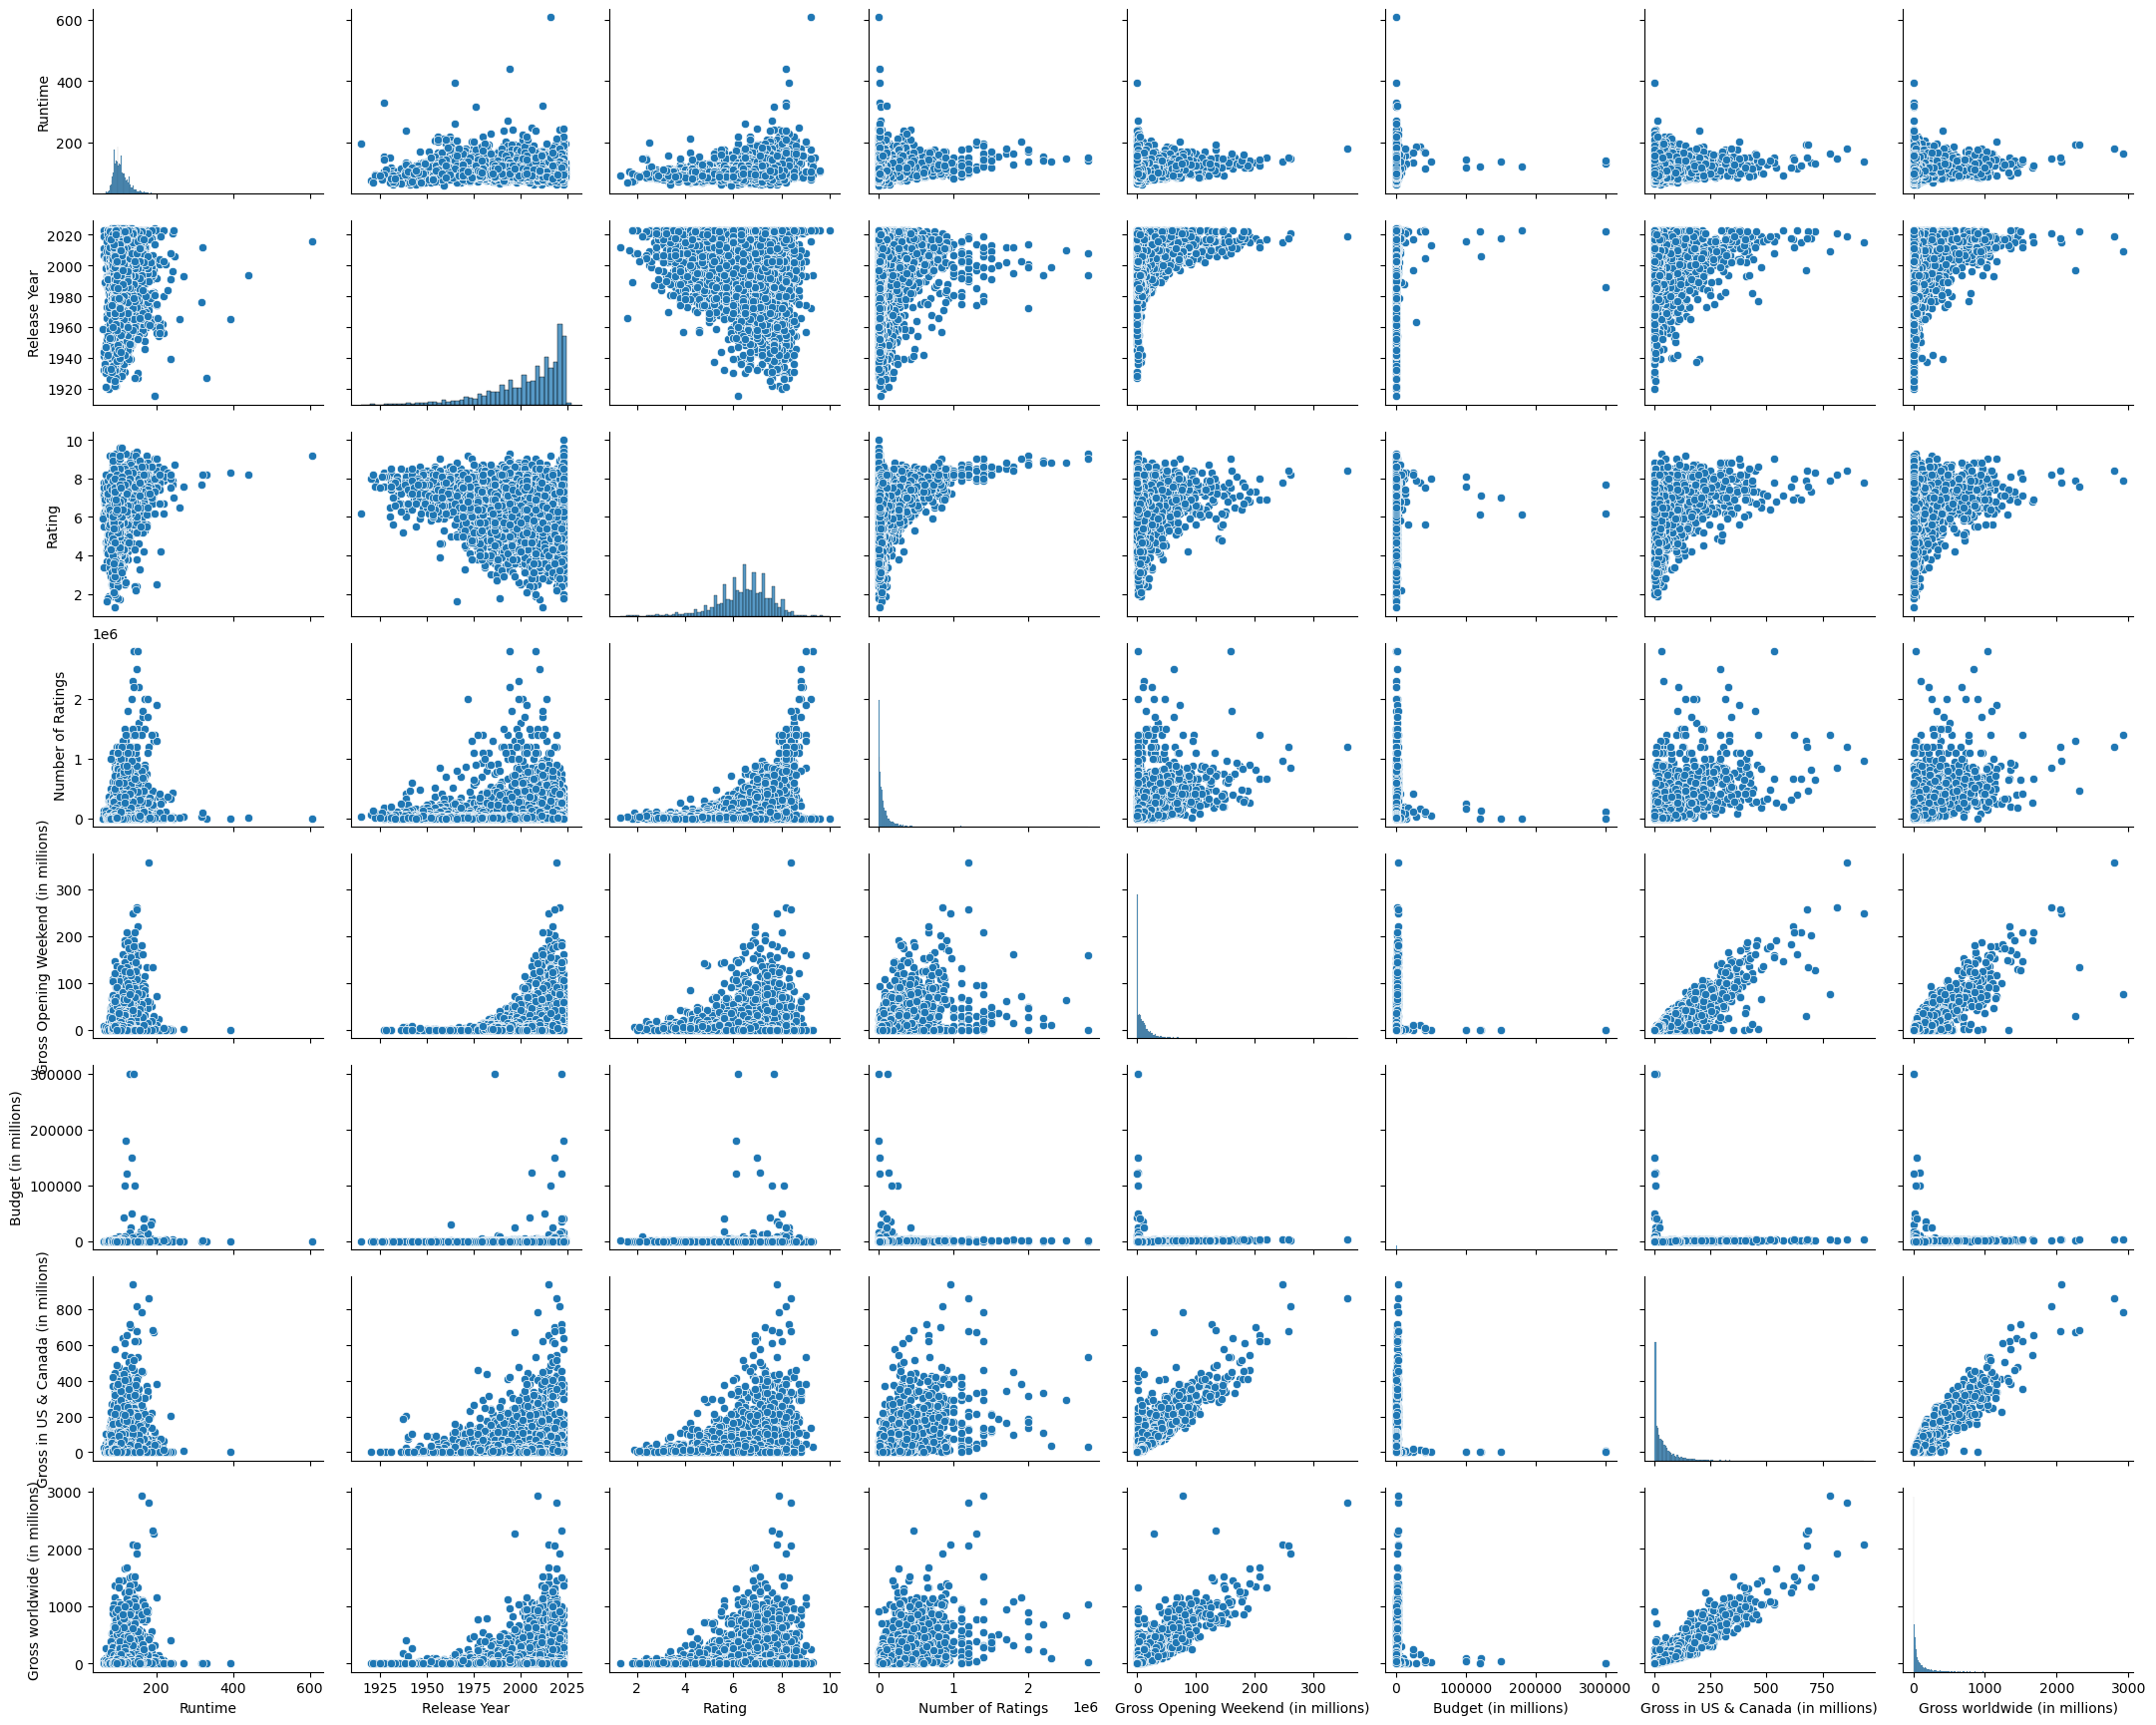

In [129]:
sns.pairplot(imdb, height=2.2, aspect=1.25)
plt.savefig('pariplot.png');
# Visualize some relationships

/Users/riemeanetor/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

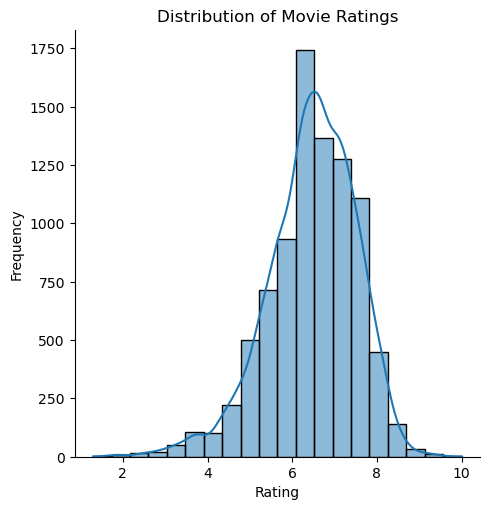

In [10]:
# Convert 'Rating' column to integer type
imdb['Rating'] = imdb['Rating'].astype(float)
# Plotting the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.displot(imdb['Rating'], bins=20, kde=True) 
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

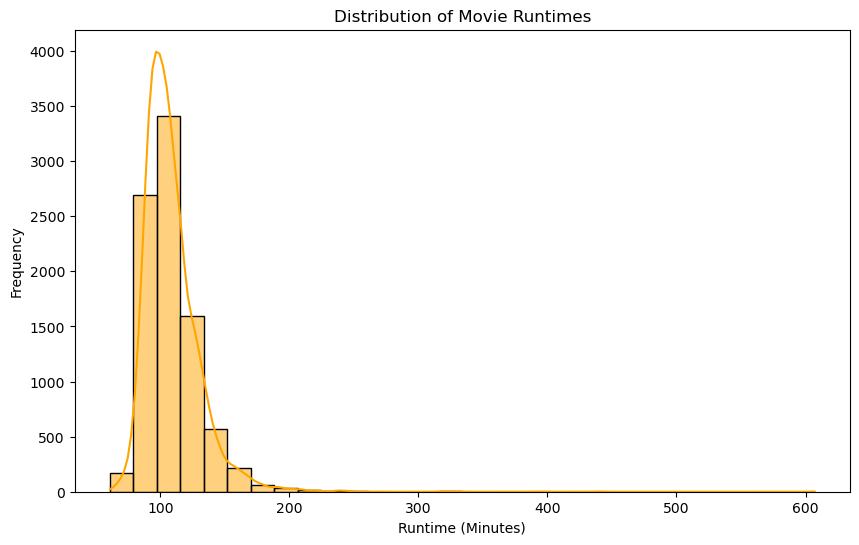

In [11]:
# Plotting the distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(imdb['Runtime'], bins=30, kde=True, color='orange')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.show()


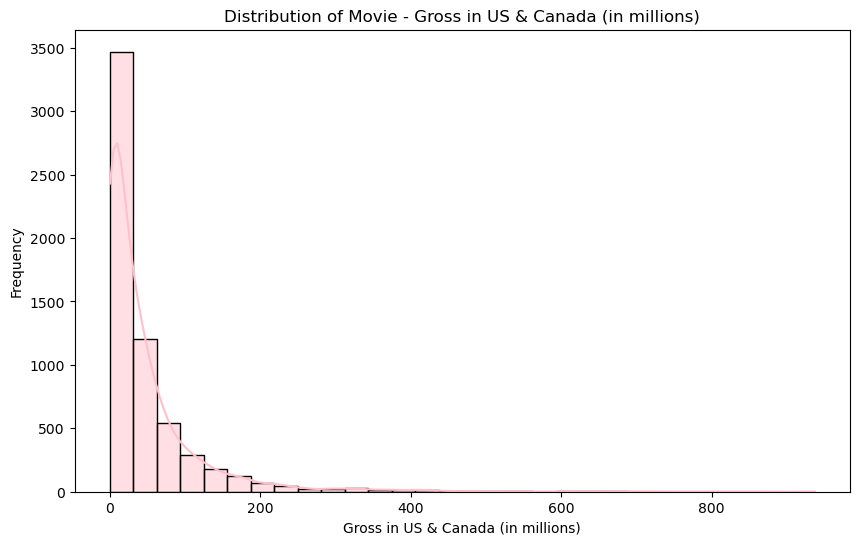

count    6064.000000
mean       46.809895
std        72.906104
min         0.000000
25%         4.105000
50%        22.978500
75%        57.474500
max       936.662000
Name: Gross in US & Canada (in millions), dtype: float64

In [234]:
# Plotting the distribution of movie budget
plt.figure(figsize=(10, 6))
sns.histplot(imdb['Gross in US & Canada (in millions)'], bins=30, kde=True, color='pink')
plt.title('Distribution of Movie - Gross in US & Canada (in millions)')
plt.xlabel('Gross in US & Canada (in millions)')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for movie runtimes
us_descriptive_stats = imdb['Gross in US & Canada (in millions)'].describe()
us_descriptive_stats

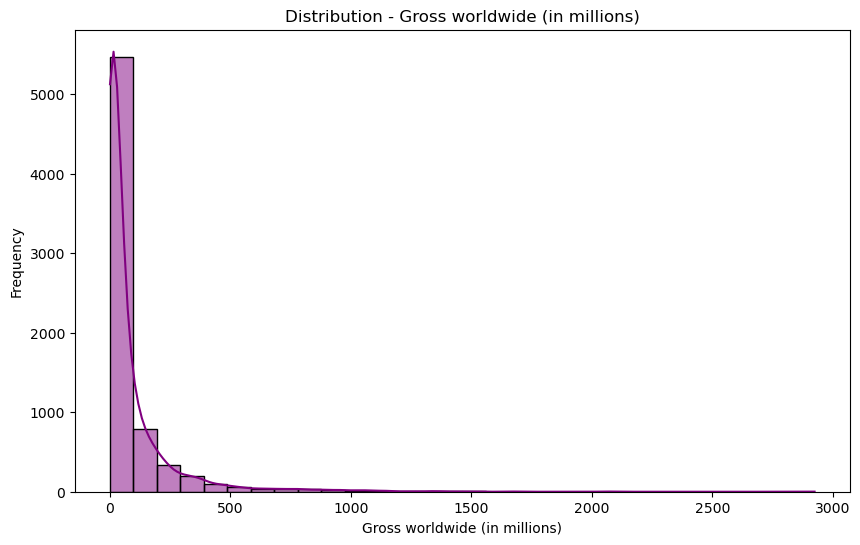

count    7128.000000
mean       87.122463
std       179.378745
min         0.000000
25%         2.923000
50%        23.838000
75%        88.971250
max      2923.706000
Name: Gross worldwide (in millions), dtype: float64

In [235]:
# Plotting the distribution of movie budget
plt.figure(figsize=(10, 6))
sns.histplot(imdb['Gross worldwide (in millions)'], bins=30, kde=True, color='purple')
plt.title('Distribution - Gross worldwide (in millions)')
plt.xlabel('Gross worldwide (in millions)')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for movie runtimes
gww_descriptive_stats = imdb['Gross worldwide (in millions)'].describe()
gww_descriptive_stats

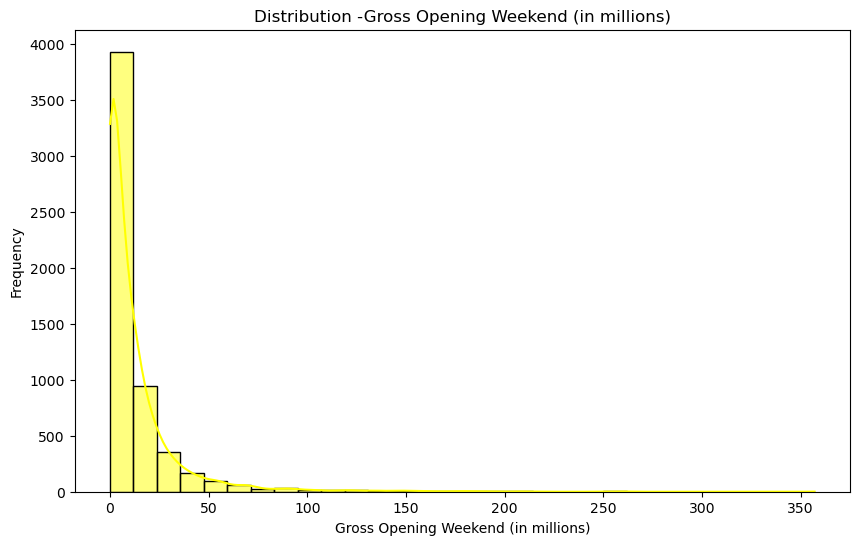

count    5695.000000
mean       12.449987
std        22.363104
min         0.000000
25%         0.204500
50%         5.304000
75%        14.694000
max       357.115000
Name: Gross Opening Weekend (in millions), dtype: float64

In [236]:
# Plotting the distribution of movie opening weekend
plt.figure(figsize=(10, 6))
sns.histplot(imdb['Gross Opening Weekend (in millions)'], bins=30, kde=True, color='yellow')
plt.title('Distribution -Gross Opening Weekend (in millions)')
plt.xlabel('Gross Opening Weekend (in millions)')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for movie runtimes
weekend_descriptive_stats = imdb['Gross Opening Weekend (in millions)'].describe()
weekend_descriptive_stats

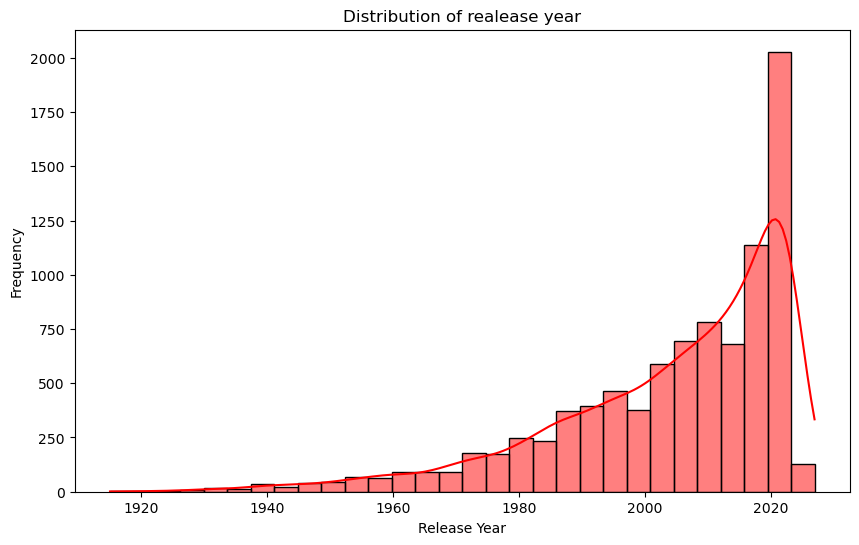

count    9076.000000
mean     2004.142133
std        18.849816
min      1915.000000
25%      1994.000000
50%      2010.000000
75%      2019.000000
max      2027.000000
Name: Release Year, dtype: float64

In [16]:
imdb['Release Year'] = imdb['Release Year'].astype('float64')
# Plotting the distribution of movie realese year
plt.figure(figsize=(10, 6))
sns.histplot(imdb['Release Year'], bins=30, kde=True, color='red')
plt.title('Distribution of realease year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for movie runtimes
Release_descriptive_stats = imdb['Release Year'].describe()
Release_descriptive_stats




## Chi Squared tests
### Motion picture rating vs main genres


In [17]:
# Splitting the genres and counting the occurrences of each genre
genre_counts = imdb['Main Genres'].str.split(',', expand=True).stack().value_counts()

genre_counts

Drama          4757
Comedy         3045
Action         2235
Adventure      1668
Thriller       1617
Crime          1597
Romance        1450
Horror         1322
Mystery         959
Fantasy         723
Sci-Fi          719
Biography       607
Family          509
Animation       426
History         307
Music           246
Sport           192
War             176
Western         119
Musical         118
Documentary     101
Film-Noir        43
Name: count, dtype: int64

In [20]:
# Simplifying the genre data to include only the primary genre if it's one of the selected genres
selected_genres = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller']
# Adjusting the function to handle NaN values in "Main Genres"
imdb['Primary Genre'] = imdb['Main Genres'].fillna('Other').apply(lambda x: x.split(',')[0] if x.split(',')[0] in selected_genres else 'Other')

# the contingency table for Motion Picture Rating vs. Primary Genre
contingency_table = pd.crosstab(imdb['Primary Genre'], imdb['Motion Picture Rating'])

pd.set_option('display.max_rows', None)

contingency_table

Motion Picture Rating,13+,16+,18+,Approved,G,GP,M,M/PG,MA-17,NC-17,...,T,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,Unrated,X
Primary Genre,,,,,,,,,,,,,,,,,,,,,
Action,3,0,1,19,16,2,1,1,0,0,...,0,13,1,53,5,0,0,1,7,0
Adventure,0,2,0,15,36,5,0,0,0,0,...,0,4,1,5,5,0,0,0,3,0
Comedy,2,2,0,37,32,0,1,0,0,6,...,0,28,3,42,19,0,0,0,25,8
Drama,1,0,1,38,16,5,2,1,1,14,...,0,23,4,73,8,0,0,0,58,7
Other,1,3,3,41,113,5,1,1,0,5,...,1,19,8,64,12,1,2,0,30,7
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,1,0


In [21]:
#Focusing the Chi-square test on a subset of the most common motion picture ratings (e.g., G, PG, PG-13, R)
# Filtering the contingency table for selected ratings: G, PG, PG-13, R

selected_ratings = ['G', 'PG', 'PG-13', 'R']
filtered_contingency_table = contingency_table[selected_ratings]

# Performing the Chi-square test on the filtered contingency table
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(filtered_contingency_table)

chi2, p, dof, expected

(696.464664808306,
 1.0538890486855795e-138,
 15,
 array([[5.49465570e+01, 2.96143885e+02, 5.00968140e+02, 9.04941418e+02],
        [1.38226398e+01, 7.44994861e+01, 1.26026134e+02, 2.27651740e+02],
        [5.10374394e+01, 2.75075026e+02, 4.65327265e+02, 8.40560270e+02],
        [3.71209808e+01, 2.00069887e+02, 3.38445750e+02, 6.11363383e+02],
        [5.53843782e+01, 2.98503597e+02, 5.04959918e+02, 9.12152107e+02],
        [6.88004698e-01, 3.70811922e+00, 6.27279401e+00, 1.13310821e+01]]))

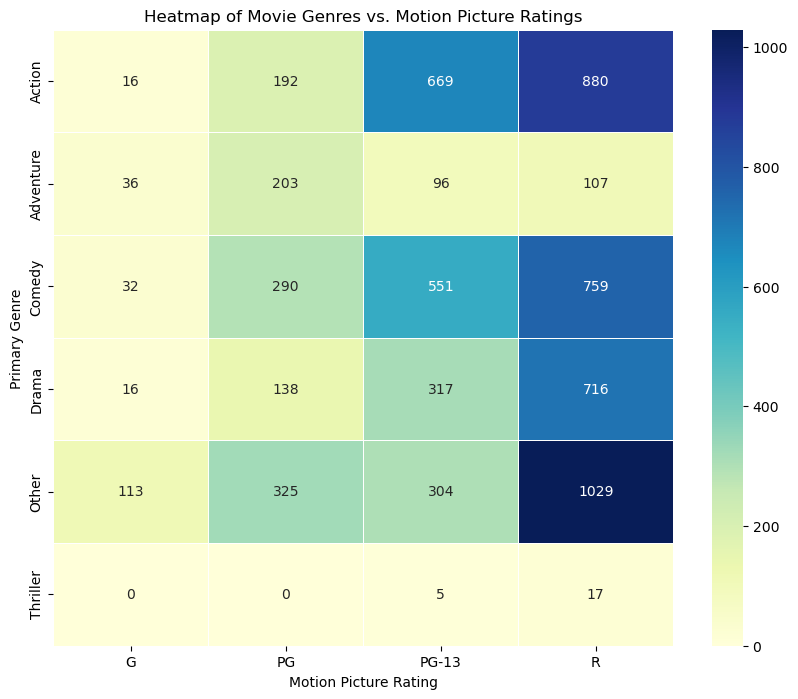

In [22]:
# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generating a heatmap
sns.heatmap(filtered_contingency_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

# Adding titles and labels
plt.title('Heatmap of Movie Genres vs. Motion Picture Ratings')
plt.ylabel('Primary Genre')
plt.xlabel('Motion Picture Rating')

# Displaying the heatmap
plt.show()

# Machine Learning
## K Means Clustering 


In [ ]:
#Pick features
#Drop nans and outliers - IQR methods

In [218]:

# Selecting the relevant features for K-Means clustering
#features = imdb[['Gross worldwide (in millions)', 'Gross Opening Weekend (in millions)']]

features = imdb[['Gross worldwide (in millions)', 'Budget (in millions)']]
# Drop rows with any NaN values to clean the data before identifying outliers

features = (features - features.mean()) / features.std() # Perform Z-score standardization
features_clean = features.dropna()

# Calculating the IQR for each feature
Q1 = features_clean.quantile(0.25)
Q3 = features_clean.quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for what's considered an acceptable range (no outlier)
lower_bound = Q1 - 4.5 * IQR
upper_bound = Q3 + 4.5 * IQR

# Removing outliers
features_no_outliers = features_clean[(features_clean >= lower_bound) & (features_clean <= upper_bound)]

# Drop the rows where at least one element is NaN after outlier removal
features_no_outliers = features_no_outliers.dropna()

features_no_outliers.describe()


,Gross worldwide (in millions),Budget (in millions)
count,5111.000000,5111.000000
mean,-0.003352,-0.048126
std,0.636840,0.053496
min,-0.485690,-0.095516
25%,-0.422611,-0.084253
50%,-0.255490,-0.067358
75%,0.146746,-0.032161
max,3.050615,0.221261


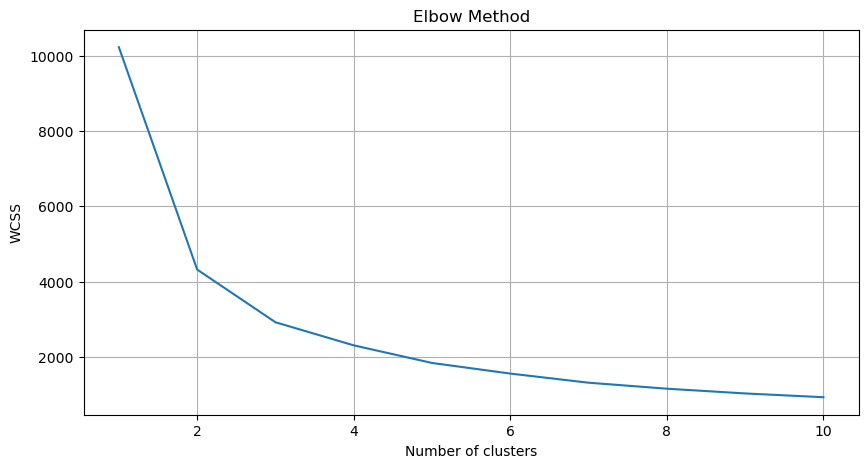

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Selecting numerical features for clustering
#features = imdb[['Gross worldwide (in millions)', 'Budget (in millions)']].dropna()

# Normalizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_no_outliers)

# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(True)
plt.show()


In [227]:
# Applying K-Means clustering with a chosen number of clusters to the original feature set
kmeans_final = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans_final.fit_predict(features_scaled)

# Adding the cluster labels to the original data (for those rows used in clustering)
features_no_outliers['Cluster'] = cluster_labels

features_no_outliers

,Gross worldwide (in millions),Budget (in millions),Cluster
1,0.583160,0.045274,0
7,0.563470,0.214221,0
8,-0.199837,0.186064,0
9,0.095098,0.017116,1
10,0.362677,0.186064,0
12,1.099442,-0.067358,0
13,0.235064,0.050905,0
16,0.194614,-0.011042,1
23,-0.198136,-0.011042,1
25,0.000694,-0.032161,1


In [228]:
# Calculating the mean values for features within each cluster
cluster_means = features_no_outliers.groupby('Cluster').mean()

cluster_means

,Gross worldwide (in millions),Budget (in millions)
Cluster,,
0,1.106514,0.041361
1,-0.222880,-0.065827


In [229]:
from sklearn.metrics import silhouette_score

# Retrieve the feature columns for silhouette score calculation
feature_columns = features_no_outliers.drop('Cluster', axis=1)

# Retrieve the cluster assignments
cluster_assignments = features_no_outliers['Cluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(feature_columns, cluster_assignments)

silhouette_avg


0.6672154597605636

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


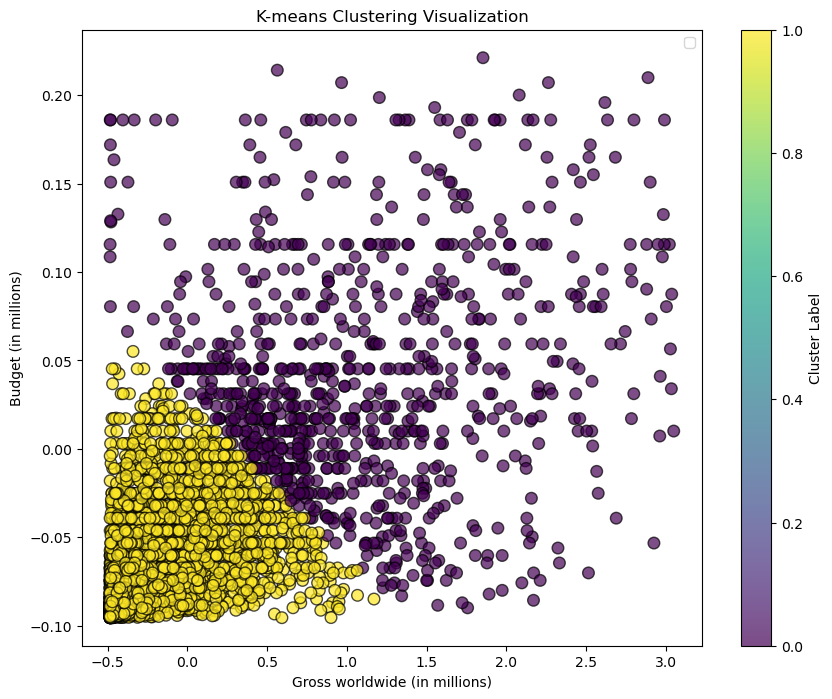

In [233]:
# Extracting the two features for plotting
feature_x = features_no_outliers.columns[0]
feature_y = features_no_outliers.columns[1]

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(features_no_outliers[feature_x], features_no_outliers[feature_y], c=features_no_outliers['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.7)


plt.title('K-means Clustering Visualization')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.colorbar(label='Cluster Label')

plt.show()

